In [115]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
categories = pd.read_csv('csv/d_categories.csv')
conditions = pd.read_csv('csv/d_conditions.csv')
countries = pd.read_csv('csv/d_countries.csv')
customers = pd.read_csv('csv/d_customers.csv')
manufacturers = pd.read_csv('csv/d_manufacturers.csv')
questions = pd.read_csv('csv/d_questions.csv')
reviews = pd.read_csv('csv/d_reviews1.csv')
products = pd.read_csv('csv/f_products.csv')

In [117]:
products['purchase_date'] = pd.to_datetime(products['purchase_date'])
df = products.merge(categories, on='category_id', how='inner')
df = df.merge(conditions, on='condition_id', how='left')
df = df.merge(countries, on='country_id', how='left')
df = df.merge(manufacturers, on='manufacturer_id', how='left')
df = df.merge(questions, on='product_id', how='left')
df = df.merge(reviews, on='product_id', how='left')
df = df.set_index('purchase_date').sort_index()

In [118]:
df.category

purchase_date
2016-01-01              Arts & Crafts
2016-01-01                      Games
2016-01-01             Party Supplies
2016-01-01    Die-Cast & Toy Vehicles
2016-01-01         Figures & Playsets
                       ...           
2022-12-27                    Hobbies
2022-12-29              Arts & Crafts
2022-12-30      Sports Toys & Outdoor
2022-12-31      Sports Toys & Outdoor
2022-12-31                Fancy Dress
Name: category, Length: 10763, dtype: object

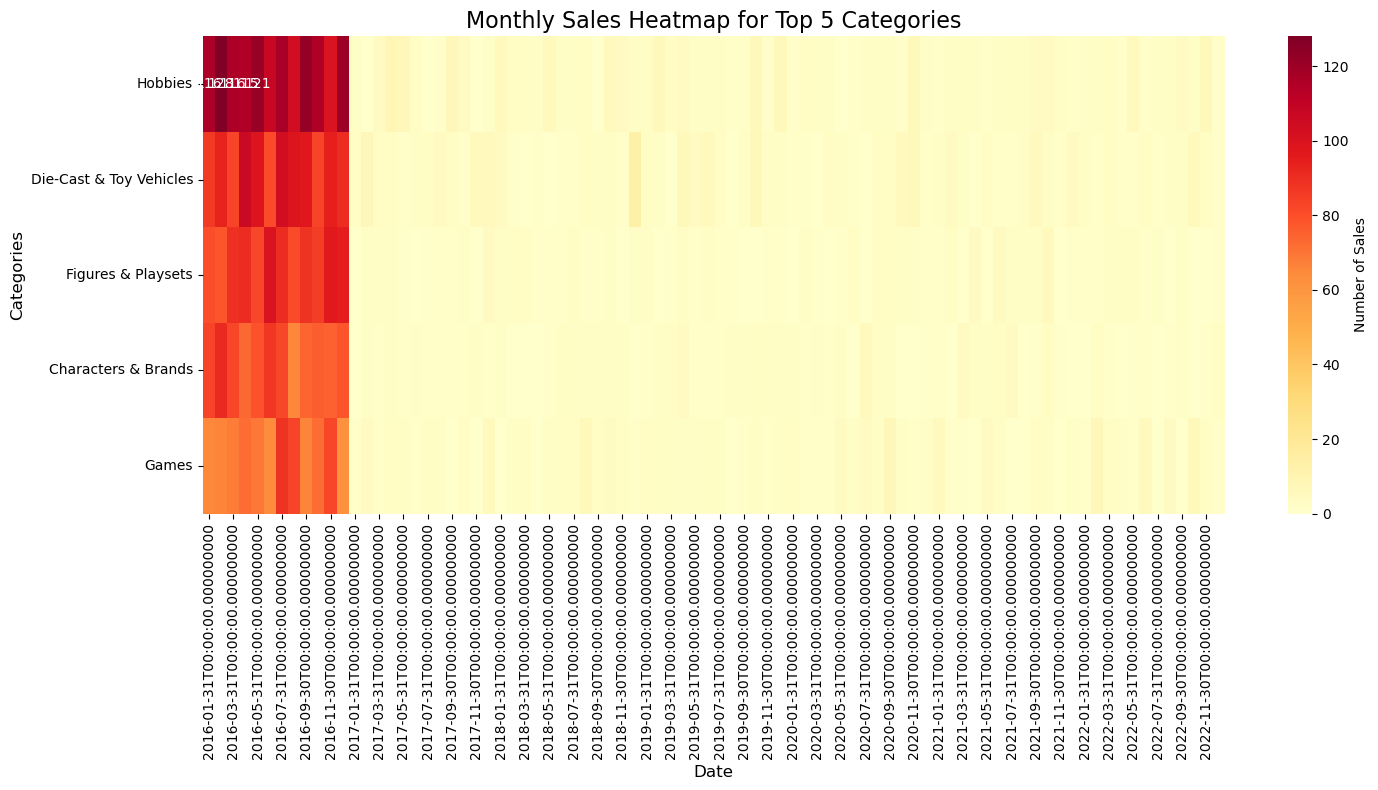

In [125]:
df.index = pd.to_datetime(df.index)

# Group by date and category
daily_sales_by_category = df.groupby([df.index.date, 'category']).size().unstack(fill_value=0)

# Set the index to datetime
daily_sales_by_category.index = pd.to_datetime(daily_sales_by_category.index)

# Now resample to get monthly sales
monthly_sales_by_category = daily_sales_by_category.resample('M').sum()

# Get the top 5 categories by total sales
top_categories = monthly_sales_by_category.sum().sort_values(ascending=False).head(5).index

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(monthly_sales_by_category[top_categories].T, cmap="YlOrRd", annot=True, fmt="g", cbar_kws={'label': 'Number of Sales'})

plt.title('Monthly Sales Heatmap for Top 5 Categories', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Categories', fontsize=12)
plt.tight_layout()
plt.show()